Whiskas cat food, shown above, is manufactured by Uncle Ben’s. Uncle Ben’s want to produce their cat food products as cheaply as possible while ensuring they meet the stated nutritional analysis requirements shown on the cans. Thus they want to vary the quantities of each ingredient used (the main ingredients being chicken, beef, mutton, rice, wheat and gel) while still meeting their nutritional standards.

The costs of the chicken, beef, and mutton are $0.013, $0.008 and $0.010 respectively, while the costs of the rice, wheat and gel are $0.002, $0.005 and $0.001 respectively. (All costs are per gram.) For this exercise we will ignore the vitamin and mineral ingredients. (Any costs for these are likely to be very small anyway.)

Each ingredient contributes to the total weight of protein, fat, fibre and salt in the final product. The contributions (in grams) per gram of ingredient are given in the table below.


|Stuff	|Costs | Protein	|Fat	|Fibre	|Salt|
|---|---|---|---|---|---|
|Chicken	|0.013 | 0.100	|0.080	|0.001	|0.002|
|Beef	|0.008 | 0.200	|0.100	|0.005	|0.005|
|Rice	|0.002| 0.000	|0.010	|0.100	|0.002|
|Wheat bran	|0.005 | 0.040	|0.010	|0.150	|0.008|
| Mutton | 0.010| 0.15 | 0.110 | 0.003 | 0.007 |
| Gel | 0.001| 0.010 | 0.007 | 0.02 | 0.01 |

In [1]:
"""
The Full Whiskas Model Python Formulation for the PuLP Modeller

Authors: Antony Phillips, Dr Stuart Mitchell  2007
"""

# Creates a list of the Ingredients
ingredients = ['CHICKEN', 'BEEF', 'MUTTON', 'RICE', 'WHEAT', 'GEL']

# dictionaries for the costs, protein level...
costs = {'CHICKEN': 0.023, 'BEEF': 0.008, 'MUTTON': 0.010, 'RICE': 0.002, 'WHEAT': 0.005, 'GEL': 0.001}
protein_percent = {'CHICKEN': 0.100, 'BEEF': 0.200, 'MUTTON': 0.150, 'RICE': 0.000, 'WHEAT': 0.040, 'GEL': 0.010}
fat_percent = {'CHICKEN': 0.080, 'BEEF': 0.100, 'MUTTON': 0.110, 'RICE': 0.010, 'WHEAT': 0.010, 'GEL': 0.007}
fibre_percent = {'CHICKEN': 0.001, 'BEEF': 0.005, 'MUTTON': 0.003, 'RICE': 0.100, 'WHEAT': 0.150, 'GEL': 0.2}
salt_percent = {'CHICKEN': 0.002, 'BEEF': 0.005, 'MUTTON': 0.007, 'RICE': 0.002, 'WHEAT': 0.008, 'GEL': 0.01}

In [2]:
!pip install docplex

You are using pip version 7.0.3, however version 7.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [19]:
from docplex.mp.environment import Environment
env = Environment()
env.print_information()

* system is: Windows 64bit
* CPLEX wrapper is present, version is 12.6.2.0, located at: C:\ILOG\CPLEX_Studio1262\cplex\python\3.4\x64_win64
* Numpy is present, version is 1.9.2
* Matplotlib is present, version is 1.4.3


In [4]:
if env.has_matplotlib:
    %matplotlib inline
    import matplotlib.pyplot as plt

def display(myDict, title):
    if env.has_matplotlib:
        N = len(myDict)
        labels = []
        values= []
        for key, value in myDict.items():
            labels.append(key)
            values.append(value)

        ind = range(N)  # the x locations for the groups
        width = 0.35       # the width of the bars

        fig, ax = plt.subplots()
        rects1 = ax.bar(ind, values, width, color='r')	
        ax.set_title(title)
        #ax.set_xticks(ind+width)
        ax.set_xticklabels( labels )	
        #ax.legend( (rects1[0]), (title) )

        plt.show()
    else:
        print("warning: no display")

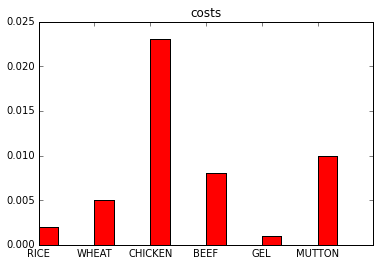

In [5]:
#for label, value in {"costs" : costs, "proteins" : protein_percent, "fat" : fat_percent, "fibre" : fibre_percent, "salt" : salt_percent}.iteritems():
for label, value in {"costs" : costs}.items():
    display(value, label)

In [6]:
from docplex.mp.context import DOcloudContext
context = DOcloudContext(url="PUT_YOUR_DOCLOUD_URL_HERE", 
                         api_key="PUT_YOUR_DOCLOUD_KEY_HERE")

In [7]:
from docloud.status import JobSolveStatus
from docplex.mp.model import Model

In [8]:
# Create the 'prob' variable to contain the problem data
mdl = Model("The Whiskas Problem", docloud_context=context)

A dictionary called ingredient_vars is created which contains the LP variables, with their defined lower bound of zero. The reference keys to the dictionary are the Ingredient names, and the data is Ingr_IngredientName. (e.g. MUTTON: Ingr_MUTTON)

In [9]:
# A dictionary called 'ingredient_vars' is created to contain the referenced Variables
ingredient_vars = dict((f , mdl.continuous_var(lb=0.0)) for f in ingredients)


Since costs and ingredient_vars are now dictionaries with the reference keys as the Ingredient names, the data can be simply extracted with a list comprehension as shown. The lpSum() function will add the elements of the resulting list. Thus the objective function is simply entered and assigned a name:

In [10]:
# The objective function is added to 'prob' first
mdl.minimize(mdl.sum(ingredient_vars[i]*costs[i] for i in ingredients))

mdl.add_constraint(mdl.sum(ingredient_vars[i] for i in ingredients) == 100)
mdl.add_constraint(mdl.sum(protein_percent[i] * ingredient_vars[i] for i in ingredients) >= 8.0)
mdl.add_constraint(mdl.sum(fat_percent[i] * ingredient_vars[i] for i in ingredients) >= 6.0)
mdl.add_constraint(mdl.sum(fibre_percent[i] * ingredient_vars[i] for i in ingredients) >= 2.0)
mdl.add_constraint(mdl.sum(salt_percent[i] * ingredient_vars[i] for i in ingredients) <= 0.4)

In [11]:
mdl.print_information()

Model: The Whiskas Problem
 - number of variables: 6
 -   binary=0, integer=0, continuous=6
 - number of constraints: 5
 -   LE=1, EQ=1, GE=3, RNG=0
 - parameters : defaults


In [12]:
mdl.solve()

True

The optimised objective function value is printed to the screen

In [13]:
print("Total Cost of Ingredients per can = ")
print(mdl.objective_value)

Total Cost of Ingredients per can = 
0.5300411522633744


In [14]:
Obj = mdl.objective_value
Solution = { i : ingredient_vars[i].solution_value for i in ingredients if ingredient_vars[i].solution_value != 0.0}
print(Solution)

{'RICE': 40.192043895747595, 'BEEF': 55.692729766803836, 'GEL': 4.115226337448561}


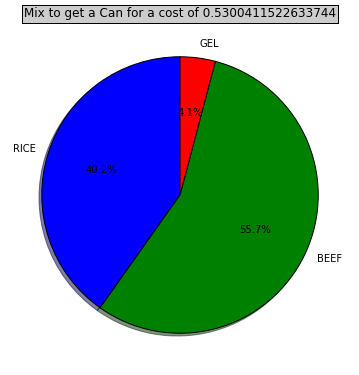

In [16]:
if env.has_matplotlib:
    from pylab import *

    # make a square figure and axes
    figure(1, figsize=(6,6))
    ax = axes([0.1, 0.1, 0.8, 0.8])

    # The slices will be ordered and plotted counter-clockwise.
    labels = []
    fracs = []
    for key,value in Solution.items():
        labels.append(key)
        fracs.append(value)
    #explode=(0.05, 0.05, 0.05, 0.05)

    pie(fracs, labels=labels,
                    autopct='%1.1f%%', shadow=True, startangle=90)
                    # The default startangle is 0, which would start
                    # the Frogs slice on the x-axis.  With startangle=90,
                    # everything is rotated counter-clockwise by 90 degrees,
                    # so the plotting starts on the positive y-axis.
    mytitle = "Mix to get a Can for a cost of " + str(Obj)
    title(mytitle, bbox={'facecolor':'0.8', 'pad':5})

    show()